In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:\\Users\\ADMIN\\OneDrive\\Desktop\\House_Price.csv")
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [5]:
# Check for missing values
print(data.isnull().sum())

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64


In [6]:
X = data.drop('price', axis=1)  
y = data['price'] 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (404, 18)
X_test shape: (102, 18)
y_train shape: (404,)
y_test shape: (102,)


In [8]:
# Choose independent and dependent variables
X = data[['age']]  
y = data['price']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients of the regression model
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Mean Squared Error: 56.001124116830525
Intercept: 30.56171652232609
Coefficient: -0.1131911800287304


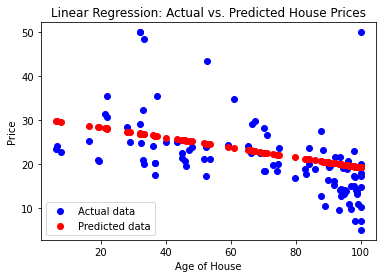

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predicted data')
plt.title('Linear Regression: Actual vs. Predicted House Prices')
plt.xlabel('Age of House')
plt.ylabel('Price')
plt.legend()
plt.show()

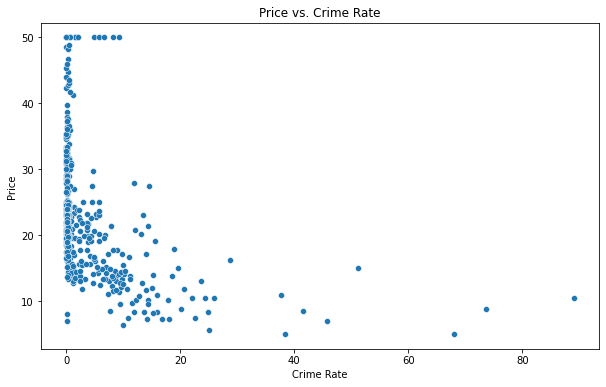

In [10]:
# Scatter plot of Price vs. Crime Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='crime_rate', y='price', data=data)
plt.title('Price vs. Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()

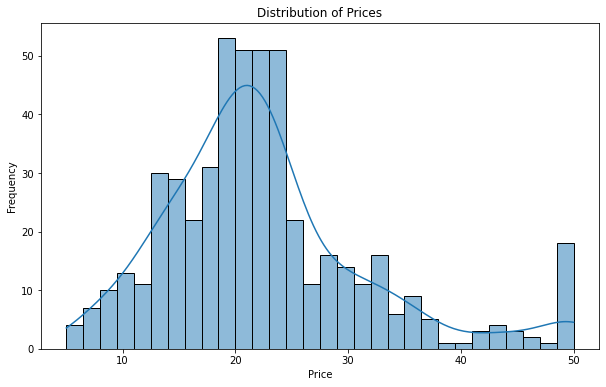

In [12]:
# Histogram of Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


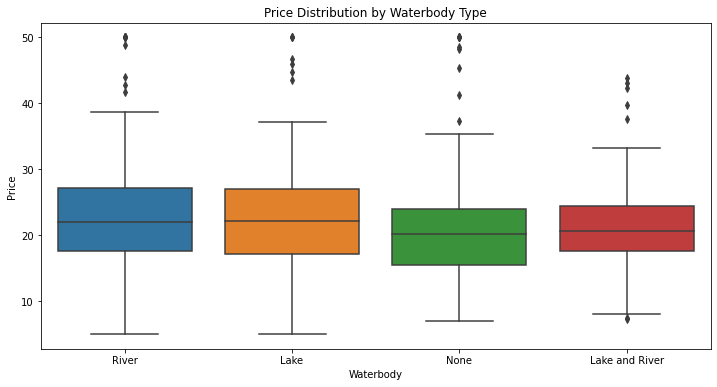

In [13]:
# Box plot of Price Distribution by Waterbody Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='waterbody', y='price', data=data)
plt.title('Price Distribution by Waterbody Type')
plt.xlabel('Waterbody')
plt.ylabel('Price')
plt.show()

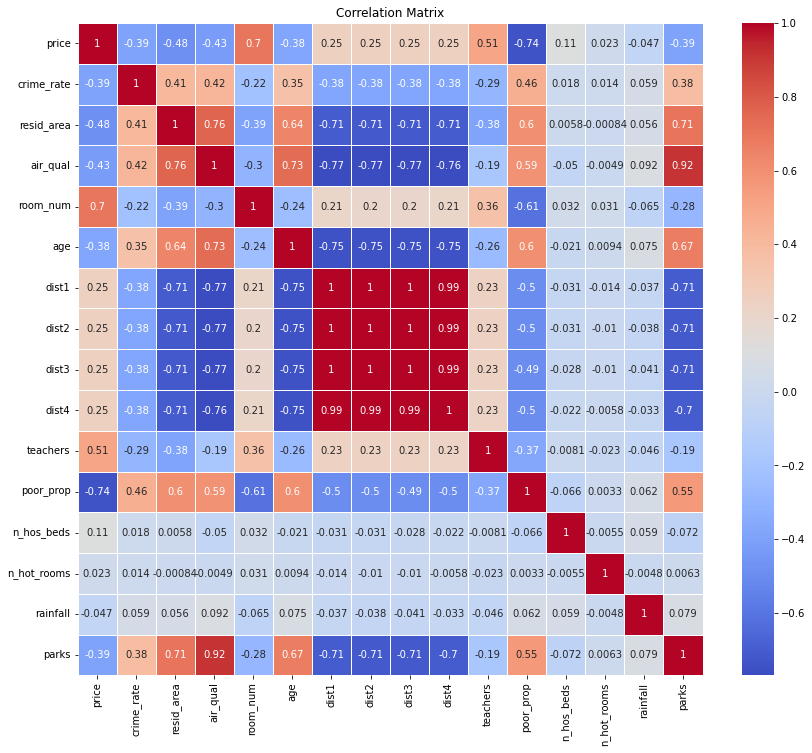

In [15]:
# Correlation Matrix
plt.figure(figsize=(14, 12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()